<a href="https://colab.research.google.com/github/AndresUrregoAngel/CBB/blob/master/AI/SupervisedML/NBclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/AndresUrregoAngel/CBB/master/AI/data/gender.csv',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Genre       8 non-null object
Taille      8 non-null int64
Poids       8 non-null float64
Pointure    8 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 336.0+ bytes


In [53]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["masculin","féminin"])
gender = le.transform(df['Genre'])
df['target_encoded']= gender
df

,Genre,Taille,Poids,Pointure,target_encoded
0,masculin,182,81.6,30,1
1,masculin,180,86.2,28,1
2,masculin,170,77.1,30,1
3,masculin,180,74.8,25,1
4,féminin,152,45.4,15,0
5,féminin,168,68.0,20,0
6,féminin,165,59.0,18,0
7,féminin,175,68.0,23,0


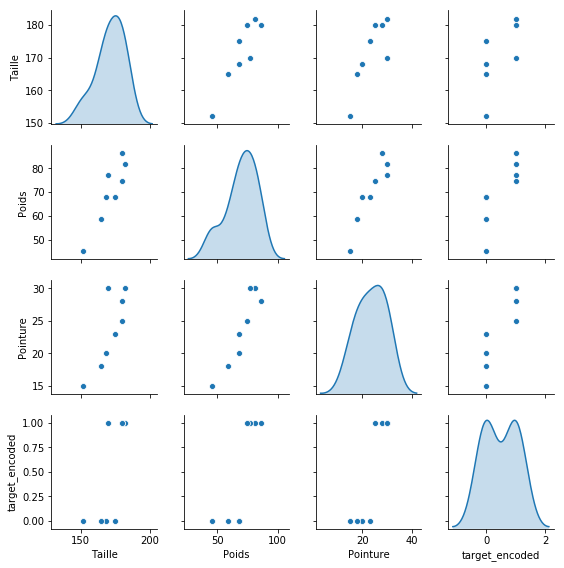

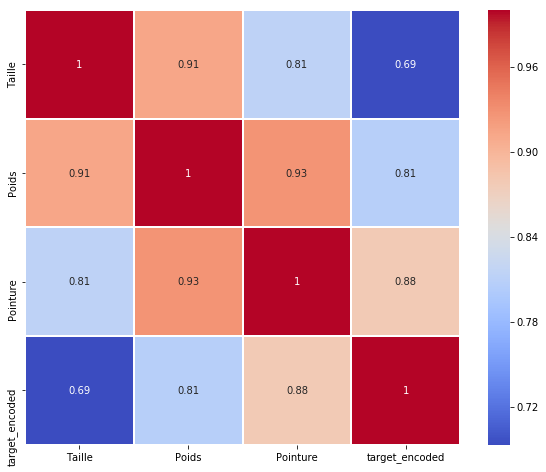

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(['Genre'],axis=1)
corr = df.corr()
corr = corr.round(3)


#pairplot

sns.pairplot(
        df,
        height=2,
        diag_kind='kde',
        dropna=True
    )


f ,ax = plt.subplots(figsize=(10,8))
sns.diverging_palette(100,10,as_cmap=True)
_ = sns.heatmap(corr,cmap="coolwarm",square=True,ax=ax,annot=True,linewidth=1.0)


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

features = df.drop(['target_encoded'],axis=1)
target = df['target_encoded']

# X_train,X_test,y_train,y_test = train_test_split()


#model
classifier =GaussianNB()
classifier.fit(features,target)

#prediction
y_pred = classifier.predict(np.array([[183,59,20]]))
y_pred

array([0])